<a href="https://colab.research.google.com/github/rvbrant/ICC/blob/master/previsao_prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Previsão de Séries Temporais com Prophet**

Para a resolução do desafio vou utilizar o Python, sendo uma das linguagens mais populares do mundo e de amplo uso na área de ciência de dados. Além disso, foram utilizados "pandas", "matplotlib" e "Prophet" (poderosa biblioteca do facebook para previsão de séries temporais) para a confecção das análises a seguir.

### Instalação e importação das bibliotecas

In [ ]:
!pip uninstall pystan
!pip install pystan~=2.14
!pip install fbprophet
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from fbprophet import Prophet

### Carregando a amostra de dados

In [8]:
from google.colab import files
uploaded = files.upload()

Saving Dados.xlsx to Dados.xlsx


In [9]:
# Importando o conjunto de dados
df = pd.read_excel("Dados.xlsx")

## **Amostra**

A amostra de análise é uma planilha com dados de vendas de um item entre 6 de dezembro de 2022 e 20 de janeiro de 2023. Nesta, há duas variáveis:


*   Data: correspondente ao dia da venda;
*   Venda: quantidade do item vendido.



In [31]:
# Verificando o conjunto de dados
df.tail(5)

,Data,Vendas
41,2023-01-16,1692
42,2023-01-17,1097
43,2023-01-18,1302
44,2023-01-19,1405
45,2023-01-20,945


In [32]:
# Informações gerais
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    46 non-null     datetime64[ns]
 1   Vendas  46 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 864.0 bytes


#**Tratamento dos dados**

### Transformando o conjunto de dados

In [12]:
# Transformação da variável "Data" em formato de data
df['Data'] = pd.to_datetime(df.Data, infer_datetime_format=True) 

In [14]:
df

,Data,Vendas
0,2022-12-06,870
1,2022-12-07,868
2,2022-12-08,1189
3,2022-12-09,742
4,2022-12-10,317
5,2022-12-11,685
6,2022-12-12,1366
7,2022-12-13,1213
8,2022-12-14,1055
9,2022-12-15,1343


### Criando o conjunto de dados no formato esperado pelo Prophet

Para utilizar  o framework Prophet, precisamos que os dados sejam um dataframe com duas colunas: ds (datastamp) e y (vendas).

In [19]:
# Tabela com vendas por mês e ano
df_semanal = df[['Data','Vendas']]\
  .groupby(['Data'], as_index = True)\
  .sum()\
  .reset_index()\
  .sort_values(['Data'], ascending=True)\
  .rename(columns={"Data": "ds", "Vendas": "y"})

In [ ]:
# Verificando o novo dataframe
df_semanal.tail()

,ds,y
41,2023-01-16,1692
42,2023-01-17,1097
43,2023-01-18,1302
44,2023-01-19,1405
45,2023-01-20,945


# **Análise descritiva**

### Visualização da série temporal

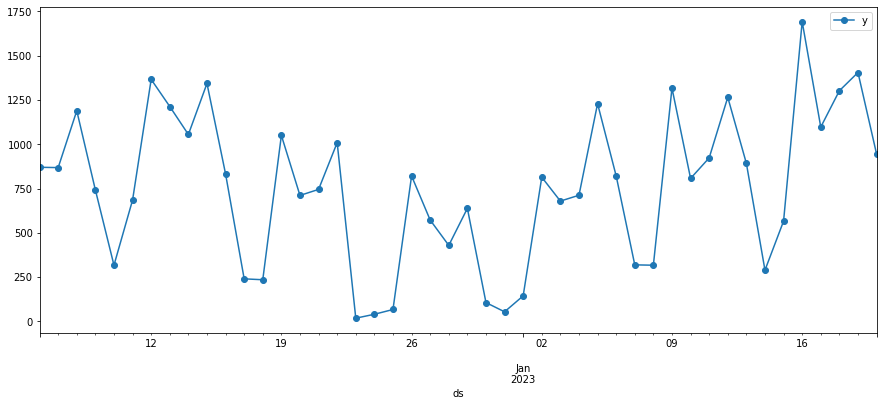

In [20]:
# Gráfico da série temporal
df_semanal.plot(x = 'ds', y = 'y', figsize = (15,6), marker='o' );

# **Previsão dos dados com Prophet**

### Modelagem com o Prophet

In [23]:
# Instanciando o modelo
modelo = Prophet()

In [24]:
# Ajustando o modelo aos dados
modelo.fit(df_semanal)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### Previsão com o Prophet

In [25]:
# Dataframe com os períodos futuros para as previsões
st_futuro = modelo.make_future_dataframe(
    periods= 5, 
    freq = 'd', 
    include_history = True
)

# df gerado
st_futuro

,ds
0,2022-12-06
1,2022-12-07
2,2022-12-08
3,2022-12-09
4,2022-12-10
5,2022-12-11
6,2022-12-12
7,2022-12-13
8,2022-12-14
9,2022-12-15


In [26]:
# Realizando as previsões
previsao_Prophet = modelo.predict(st_futuro)

In [28]:
# Previsões das ultimas instâncias (até o dia 25/01/2023) com intervalo de confiança
previsao_Prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
46,2023-01-21,299.384906,11.300511,623.875610
47,2023-01-22,425.262724,106.952654,769.302914
48,2023-01-23,1266.380088,953.981498,1606.895140
49,2023-01-24,952.295293,632.806801,1274.013819
50,2023-01-25,964.472153,640.249834,1273.413036


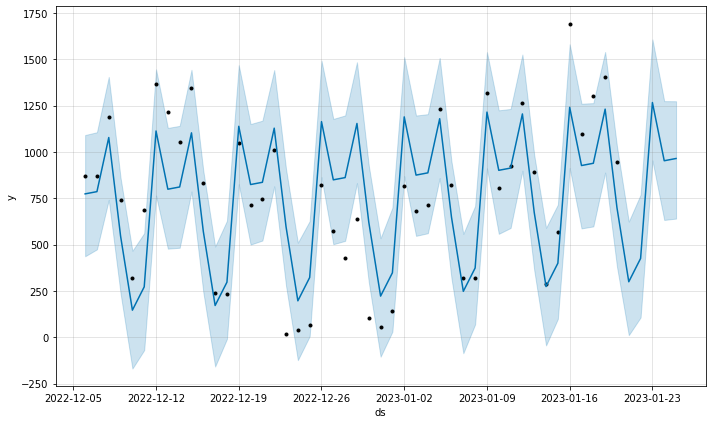

In [30]:
# Fazendo grafico da previsão para os próximos 5 dias
grafico_previsao_Prophet = modelo.plot(previsao_Prophet)
grafico_previsao_Prophet.show()

## Referências


*   https://facebook.github.io/prophet/
*   https://github.com/jonates/previsao_vendas_com_prophet

